In [35]:
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
sns.set()
import numpy as np

In [36]:
!pip install --upgrade scikit-learn
!pip install --upgrade joblib


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [37]:
data = pd.read_csv("cement_data.csv")

In [38]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [40]:
data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [41]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


### Data Description
Given is the variable name, variable type, the measurement unit and a brief description.
The concrete compressive strength is the regression problem. The order of this listing
corresponds to the order of numerals along the rows of the database.

Name -- Data Type -- Measurement -- Description

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable

Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable

Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable

Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable

Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable

Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable

Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable

Age -- quantitative -- Day (1~365) -- Input Variable

Concrete compressive strength -- quantitative -- MPa -- Output Variable

In [42]:
X = data.drop(['Concrete compressive strength(MPa, megapascals) '],axis=1)
y = data['Concrete compressive strength(MPa, megapascals) ']

In [43]:
# before doing the log transformation,
#let's add 1 to each value in everycolumn so that we don't get exception while calculationg the log for value 0

for column in X.columns:
    X[column]+=1
    X[column] = np.log(X[column])

C:\Users\ajitr\AppData\Local\Temp\ipykernel_22984\3104606985.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[column])
C:\Users\ajitr\AppData\Local\Temp\ipykernel_22984\3104606985.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[column])
C:\Users\ajitr\AppData\Local\Temp\ipykernel_2298

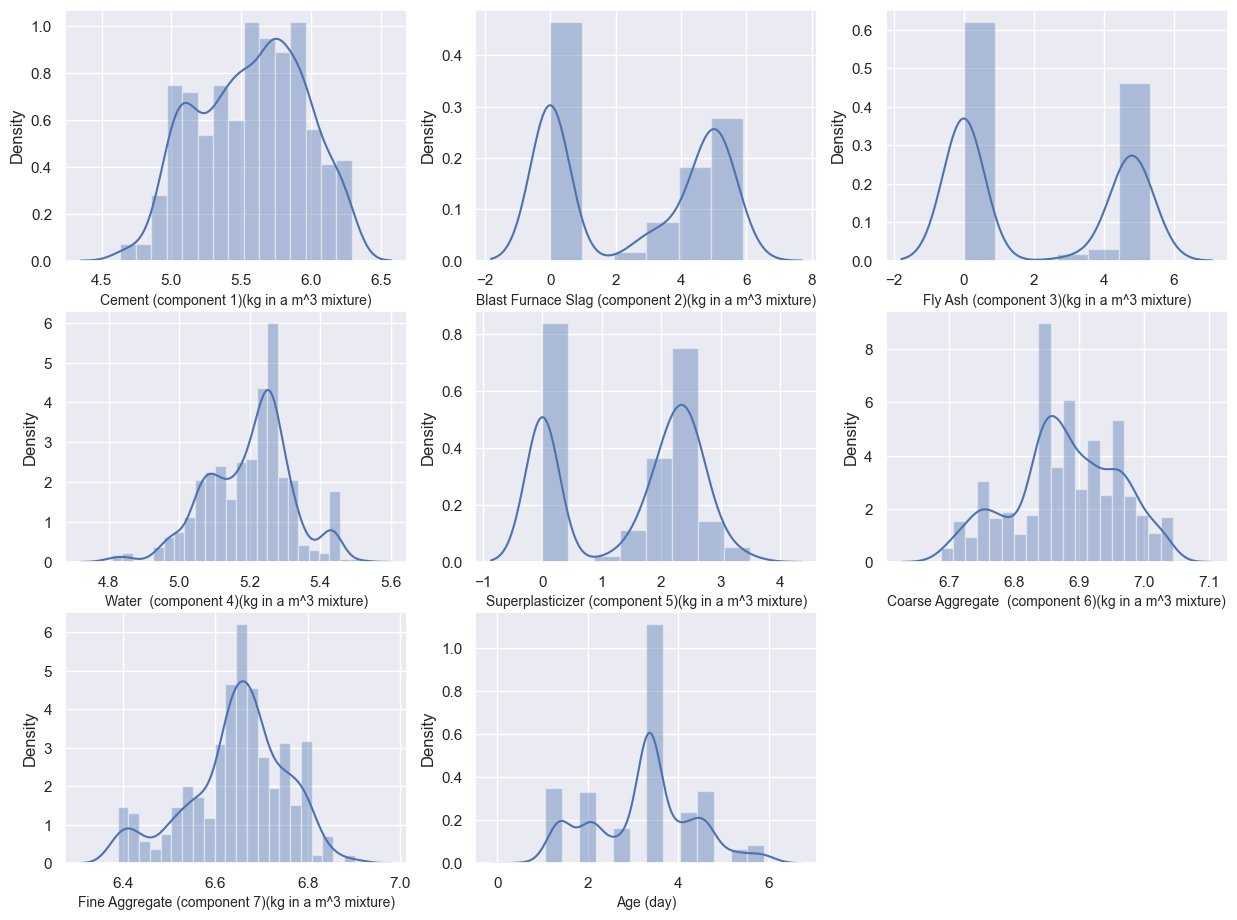

In [44]:
import numpy as np

plot.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in X.columns:
    ax = plot.subplot(4,3,plotnumber)
    sns.distplot(X[column])
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

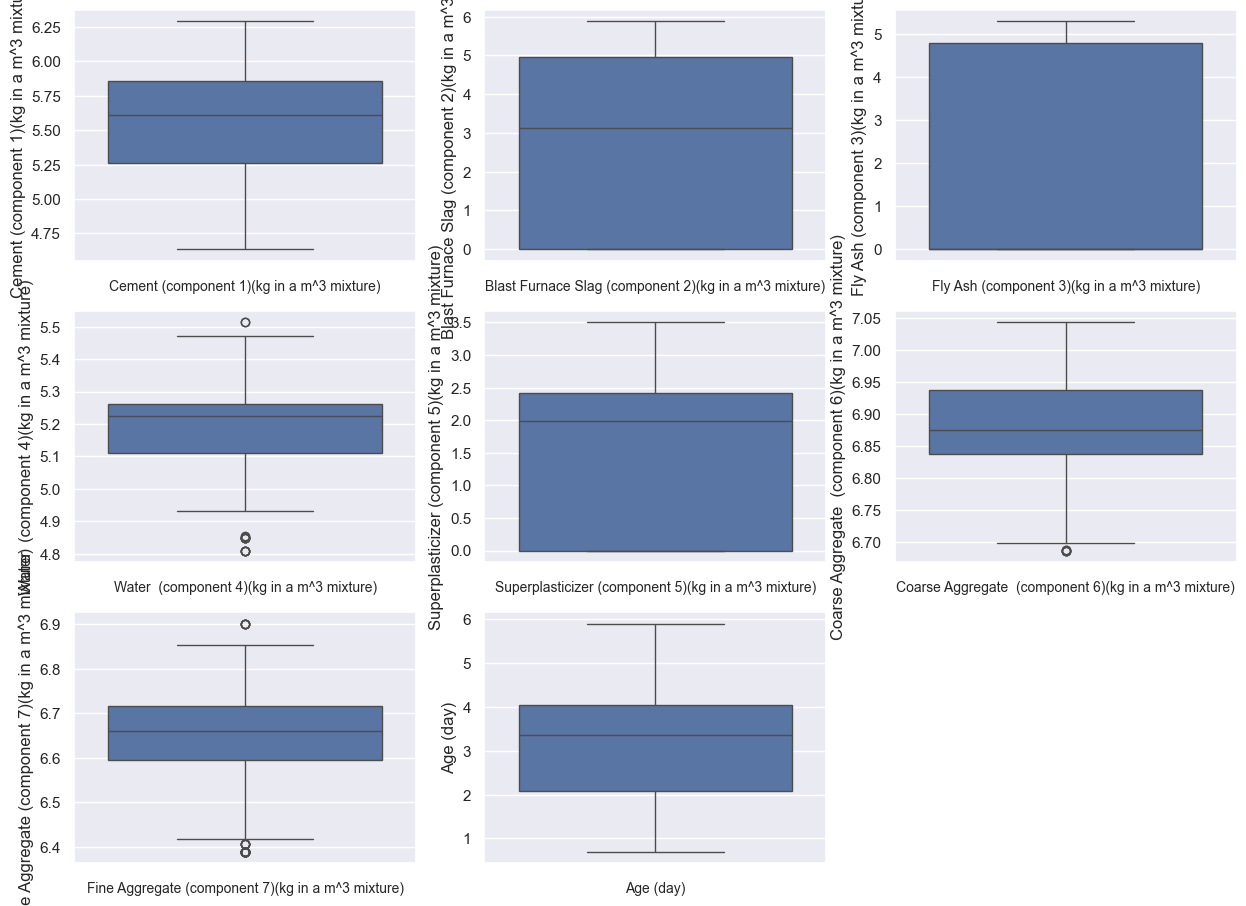

In [45]:
# check for outliers

plot.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in X.columns:
    ax = plot.subplot(4,3,plotnumber)
    #data[column]+=1
    sns.boxplot((X[column]))
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

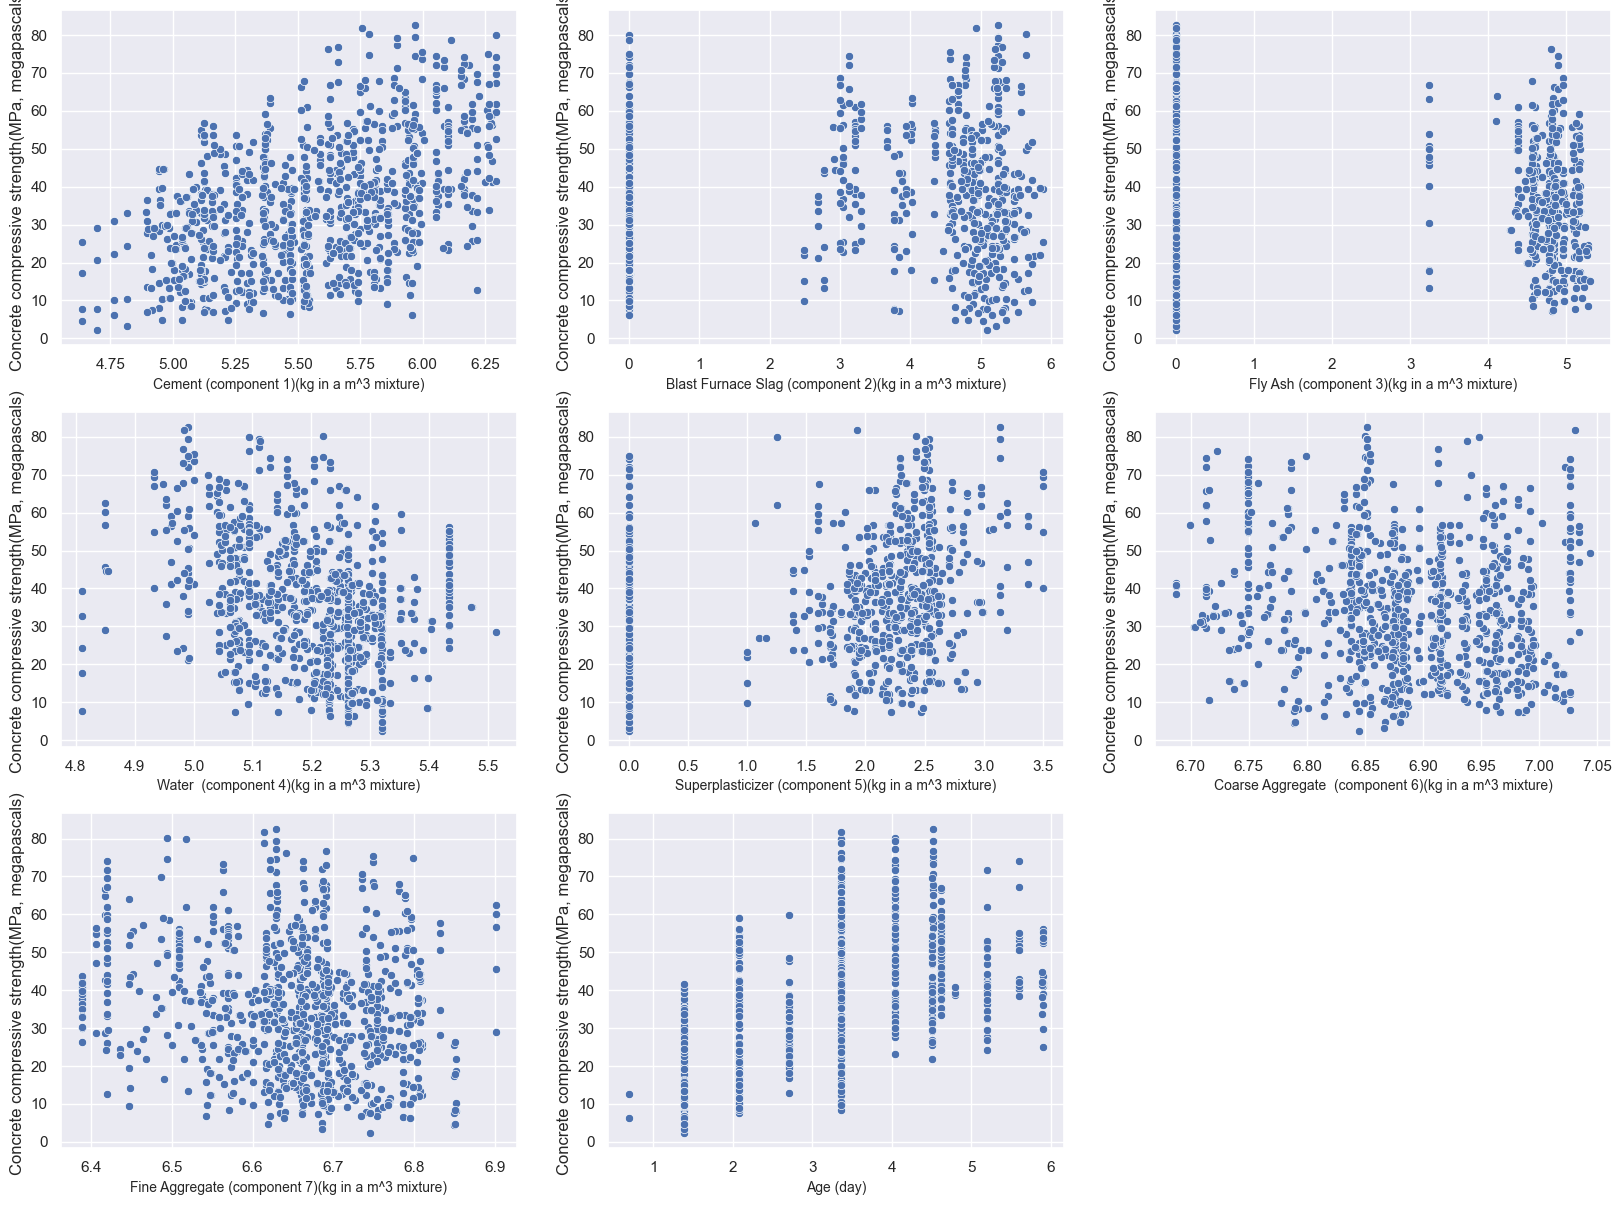

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 20), facecolor='white')
plotnumber = 1

for column in X.columns:
    ax = plt.subplot(4, 3, plotnumber)
    sns.scatterplot(x=X[column], y=y)
    plt.xlabel(column, fontsize=10)
    plotnumber += 1

plt.show()

<Axes: >

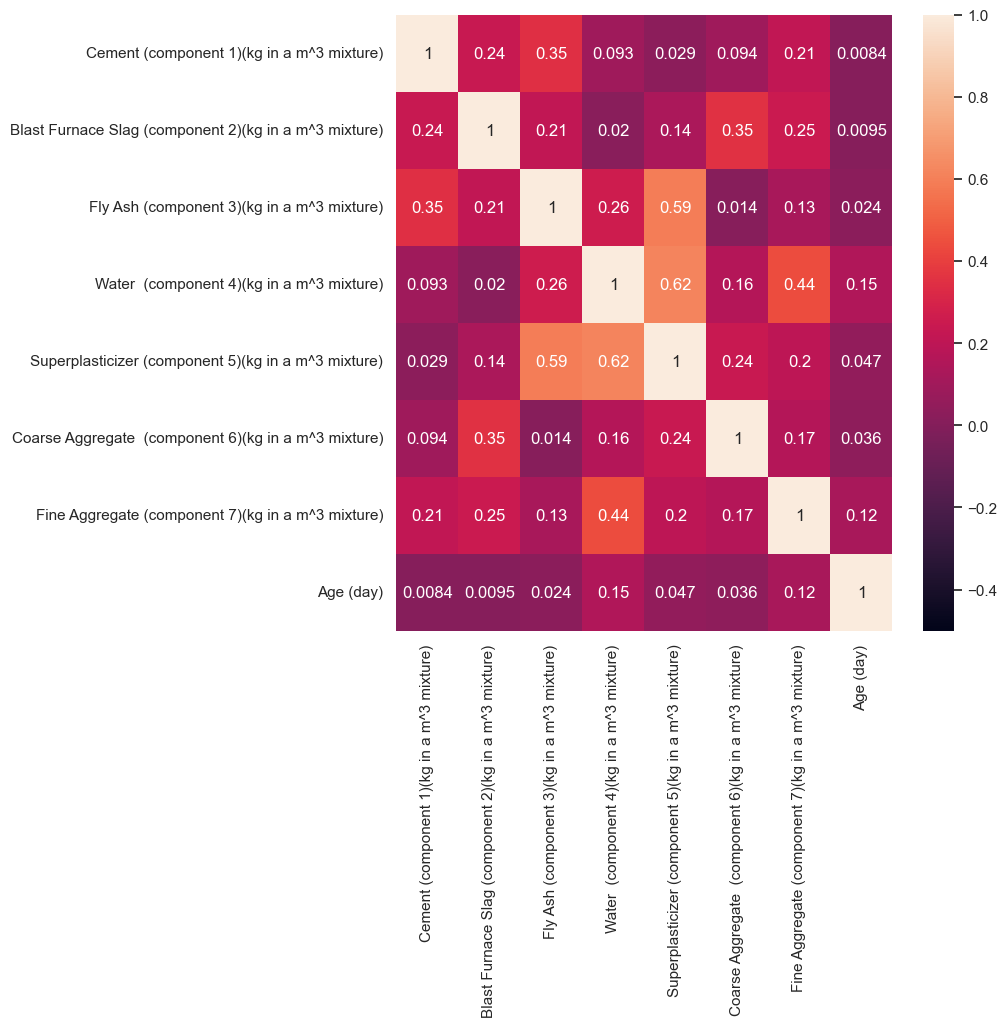

In [47]:
#check for correaltion using heatmap

plot.figure(figsize=(8,8))
sns.heatmap(X.corr().abs(), vmin = -0.5,vmax = 1,annot=True)


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2,random_state=50)

In [50]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
# Preprocessing pipeline
preprocessor = make_pipeline(KNNImputer(n_neighbors=3), StandardScaler())


In [52]:
# The models with their respective hyperparameters to tune
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1),
    'Lasso Regression': Lasso(alpha=1),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
}

In [53]:
# Fitting and evaluation of each model
for model_name, model in models.items():
    # Pipeline creation
    pipeline = make_pipeline(preprocessor, model)

    # Pipeline fitting to the training data
    pipeline.fit(X_train, y_train)

    # Evaluation of the pipeline on the test data
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Printing the mean squared error
    print(f'{model_name} - Mean Squared Error: {mse:.2f}')
    print(f'{model_name} - r2 score: {r2:.2f}')
    print("-------------------------------------------------------------------")

Linear Regression - Mean Squared Error: 52.26
Linear Regression - r2 score: 0.81
-------------------------------------------------------------------
Ridge Regression - Mean Squared Error: 52.27
Ridge Regression - r2 score: 0.81
-------------------------------------------------------------------
Lasso Regression - Mean Squared Error: 57.12
Lasso Regression - r2 score: 0.79
-------------------------------------------------------------------
Random Forest Regression - Mean Squared Error: 27.54
Random Forest Regression - r2 score: 0.90
-------------------------------------------------------------------
Gradient Boosting Regression - Mean Squared Error: 28.58
Gradient Boosting Regression - r2 score: 0.89
-------------------------------------------------------------------


In [54]:
model=RandomForestRegressor()

In [55]:
scaler = StandardScaler()
scaled_train_data=scaler.fit_transform(X_train)
scaled_test_data=scaler.transform(X_test)

In [56]:
# The hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [57]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(model, param_grid=param_grid, cv=5, verbose=3, n_jobs=-1)


In [58]:
gs.fit(scaled_train_data,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=3)

In [59]:
gs.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [60]:
gs.best_score_

0.9046263581580556

In [61]:
best_model = RandomForestRegressor(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200
)

In [62]:
best_model.fit(scaled_train_data,y_train)

RandomForestRegressor(n_estimators=200)

In [63]:
y_pred=best_model.predict(scaled_test_data)

In [64]:
mean_squared_error(y_test, y_pred)

27.16374793704455

In [65]:
r2_score(y_test, y_pred)*100

89.9215477864874

#Save the model to reuse it again

In [66]:
import joblib

In [67]:
joblib.dump(best_model, 'cement_strength_rf.joblib')
joblib.dump(scaler, 'scaler.joblib')


['scaler.joblib']

In [68]:
loaded_model = joblib.load('cement_strength_rf.joblib')
loaded_scaler = joblib.load('scaler.joblib')